In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

from collections import Counter
import numpy as np
import scipy.stats as stats

pd.set_option('display.max_columns', 500)

In [2]:
from google.colab import drive
drive.mount('/content/drive' , force_remount=True)

Mounted at /content/drive


# INCLUDE CSV

In [3]:
TWITTER_DF = pd.read_csv('/content/drive/MyDrive/SEM 8/CS328/Project/Data/Twitter_Features_Filtered.csv' , index_col=None, header=0, lineterminator='\n')
# TWITTER_DF.drop(['avg_selling_price'], axis=1, inplace=True)
TWITTER_COLUMNS = list(TWITTER_DF.columns)
TWITTER_DF

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,listed_count_min,listed_count_max,created_at_user_mean,created_at_user_median,created_at_user_min,created_at_user_max,favourites_count_mean,favourites_count_median,favourites_count_min,favourites_count_max,geo_enabled,verified,statuses_count_mean,statuses_count_median,statuses_count_min,statuses_count_max,created_at_tweet_mean,created_at_tweet_median,created_at_tweet_min,created_at_tweet_max,day_mean,day_median,day_min,day_max,hour_mean,hour_median,hour_min,hour_max,video_mean,video_median,video_min,video_max,nlikes_mean,nlikes_median,nlikes_min,nlikes_max,nreplies_mean,nreplies_median,nreplies_min,nreplies_max,nretweets_mean,nretweets_median,nretweets_min,nretweets_max,avg_selling_price,personal_score_mean,personal_score_median,personal_score_min,personal_score_max,number_of_hashtags_mean,number_of_hashtags_median,number_of_hashtags_min,number_of_hashtags_max,number_of_cashtags_mean,number_of_cashtags_median,number_of_cashtags_min,number_of_cashtags_max,number_of_photos_mean,number_of_photos_median,number_of_photos_min,number_of_photos_max,number_of_urls_mean,number_of_urls_median,number_of_urls_min,number_of_urls_max,has_nft,has_crypto,number_of_tweets,permalink
0,334.00,334.0,334,334,1368.00,1368.0,1368,1368,2.0,2.0,2,2,1.599088e+09,1.599088e+09,1.599088e+09,1.599088e+09,109.00,109.0,109,109,0,0,97.00,97.0,97,97,1.616539e+12,1.616539e+12,1.616539e+12,1.616539e+12,3.00,3.0,3,3,4.00,4.0,4,4,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.75,0.75,0.75,0.75,2.00,2.0,2,2,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...
1,2901.00,2901.0,2901,2901,3027.00,3027.0,3027,3027,19.0,19.0,19,19,1.480467e+09,1.480467e+09,1.480467e+09,1.480467e+09,10826.00,10826.0,10826,10826,1,0,3035.00,3035.0,3035,3035,1.616526e+12,1.616526e+12,1.616526e+12,1.616526e+12,3.00,3.0,3,3,0.00,0.0,0,0,0.0,0.0,0,0,8.00,8.0,8,8,2.00,2.0,2,2,1.0,1.0,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.0,16.0,16,16,1.235665e+09,1.235665e+09,1.235665e+09,1.235665e+09,5363.00,5363.0,5363,5363,0,0,1651.00,1651.0,1651,1651,1.611945e+12,1.611945e+12,1.611936e+12,1.611954e+12,5.50,5.5,5,6,11.50,11.5,2,21,0.0,0.0,0,0,1.50,1.5,0,3,0.00,0.0,0,0,0.0,0.0,0,0,11768.12,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,2,https://opensea.io/assets/0x005efb3633638dd0dd...
3,76.00,76.0,76,76,20.00,20.0,20,20,1.0,1.0,1,1,1.515757e+09,1.515757e+09,1.515757e+09,1.515757e+09,12.00,12.0,12,12,0,0,16.00,16.0,16,16,1.616886e+12,1.616886e+12,1.616886e+12,1.616886e+12,7.00,7.0,7,7,4.00,4.0,4,4,0.0,0.0,0,0,0.00,0.0,0,0,0.00,0.0,0,0,0.0,0.0,0,0,0.00,1.75,1.75,1.75,1.75,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x0076b645920716be2a...
4,47.00,47.0,47,47,215.00,215.0,215,215,4.0,4.0,4,4,1.553787e+09,1.553787e+09,1.553787e+09,1.553787e+09,96.00,96.0,96,96,0,0,320.00,320.0,320,320,1.616014e+12,1.616014e+12,1.616014e+12,1.616014e+12,4.00,4.0,4,4,2.00,2.0,2,2,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,1175.19,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x00c719960bfcb4286d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62992,329.00,329.0,178,480,264.00,264.0,229,299,3.5,3.5,0,7,1.578233e+09,1.578233e+09,1.539719e+09,1.616747e+09,532.50,532.5,295,770,0,0,438.50,438.5,217,660,1.616763e+12,1.616763e+12,1.616676e+12,1.616849e+

In [ ]:
print(TWITTER_DF.info(verbose=True))

In [4]:
OPENSEA_DF = pd.read_csv('/content/drive/MyDrive/SEM 8/CS328/Project/Data/Opensea_Features_Filtered.csv' , index_col=None, header=0, lineterminator='\n')
OPENSEA_DF.drop(['Unnamed: 0'], axis=1, inplace=True)
OPENSEA_COLUMNS = list(OPENSEA_DF.columns)
OPENSEA_DF

,permalink,sell_orders,top_bid,listing_date,is_presale,transfer_fee,supports_wyvern,numEvents,transfer,successful,bid_entered,created,offer_entered,cancelled,custom,bid_withdrawn,approve,num_primary_asset_contracts,one_day_volume,one_day_change,one_day_sales,one_day_average_price,seven_day_volume,seven_day_change,seven_day_sales,seven_day_average_price,thirty_day_volume,thirty_day_change,thirty_day_sales,thirty_day_average_price,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price,is_collection_verified,is_subject_to_whitelist,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,https://opensea.io/assets/0xc7e5e9434f4a71e6db...,0.0,0.0,0.0,0,0.0,1,1,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0.011000,-0.911721,1.0,0.011000,0,0,0,0,769.000507,5.357000e+03,2.633100e+04,2.633100e+04,1673,0.143551,0,2.896410e+02,0,1,0,971,2,1,2021,0,0
1,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.000000,0.000000e+00,4.000000e+00,4.000000e+00,1,0.000000,0,0.000000e+00,0,0,0,7291,2,1,2021,0,0
2,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.000000,0.000000e+00,4.000000e+00,4.000000e+00,1,0.000000,0,0.000000e+00,0,0,0,7291,3,1,2021,0,0
3,https://opensea.io/assets/0xd07dc4262bcdbf8519...,0.0,0.0,0.0,0,0.0,1,6,1,0,0,5,0,0,0,0,0,3,0,0,0,0,748.087283,-0.524070,8284.0,0.090305,0,0,0,0,83547.309668,2.033379e+09,4.238433e+16,4.238433e+16,132848,0.000041,382,3.827521e+15,0,1,0,11248,3,1,2021,0,0
4,https://opensea.io/assets/0xd07dc4262bcdbf8519...,0.0,0.0,0.0,0,0.0,1,2,2,0,0,0,0,0,0,0,0,3,0,0,0,0,695.381334,-0.554605,11500.0,0.066974,0,0,0,0,83581.928844,2.033382e+09,4.238433e+16,4.238433e+16,132988,0.000041,382,2.838661e+15,0,1,0,11248,2,1,2021,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62992,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,3,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.000000,0.000000e+00,6.000000e+00,6.000000e+00,1,0.000000,0,0.000000e+00,0,0,0,11581,28,3,2021,0,0
62993,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,4,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1,0.000000,0,0.000000e+00,0,0,0,9903,30,3,2021,0,0
62994,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.001000,1.000000e+00,1.300000e+01,1.300000e+01,2,0.001000,0,0.000000e+00,0,0,0,14493,24,3,2021,0,0
62995,https://opensea.io/assets/0x495f947276749ce646...,0.0,0.0,0.0,1,0.0,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,0.001000,1.000000e+00,1.300000e+01,1.300000e+01,2,0.001000,0,0.000000e+00,0,0,0,14493,24,3,2021,0,0


In [5]:
FINAL_DF = TWITTER_DF.merge(OPENSEA_DF, on='permalink')
FINAL_DF

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,listed_count_min,listed_count_max,created_at_user_mean,created_at_user_median,created_at_user_min,created_at_user_max,favourites_count_mean,favourites_count_median,favourites_count_min,favourites_count_max,geo_enabled,verified,statuses_count_mean,statuses_count_median,statuses_count_min,statuses_count_max,created_at_tweet_mean,created_at_tweet_median,created_at_tweet_min,created_at_tweet_max,day_mean,day_median,day_min,day_max,hour_mean,hour_median,hour_min,hour_max,video_mean,video_median,video_min,video_max,nlikes_mean,nlikes_median,nlikes_min,nlikes_max,nreplies_mean,nreplies_median,nreplies_min,nreplies_max,nretweets_mean,nretweets_median,nretweets_min,nretweets_max,avg_selling_price,personal_score_mean,personal_score_median,personal_score_min,personal_score_max,number_of_hashtags_mean,number_of_hashtags_median,number_of_hashtags_min,number_of_hashtags_max,number_of_cashtags_mean,number_of_cashtags_median,number_of_cashtags_min,number_of_cashtags_max,number_of_photos_mean,number_of_photos_median,number_of_photos_min,number_of_photos_max,number_of_urls_mean,number_of_urls_median,number_of_urls_min,number_of_urls_max,has_nft,has_crypto,number_of_tweets,permalink,sell_orders,top_bid,listing_date,is_presale,transfer_fee,supports_wyvern,numEvents,transfer,successful,bid_entered,created,offer_entered,cancelled,custom,bid_withdrawn,approve,num_primary_asset_contracts,one_day_volume,one_day_change,one_day_sales,one_day_average_price,seven_day_volume,seven_day_change,seven_day_sales,seven_day_average_price,thirty_day_volume,thirty_day_change,thirty_day_sales,thirty_day_average_price,total_volume,total_sales,total_supply,count,num_owners,average_price,num_reports,market_cap,floor_price,is_collection_verified,is_subject_to_whitelist,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,334.00,334.0,334,334,1368.00,1368.0,1368,1368,2.0,2.0,2,2,1.599088e+09,1.599088e+09,1.599088e+09,1.599088e+09,109.00,109.0,109,109,0,0,97.00,97.0,97,97,1.616539e+12,1.616539e+12,1.616539e+12,1.616539e+12,3.00,3.0,3,3,4.00,4.0,4,4,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.75,0.75,0.75,0.75,2.00,2.0,2,2,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...,0.0,0.0,0.0,0,0.0,1,8,2,0,0,5,1,0,0,0,0,3,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,1.163000,13.0,1326.0,1326.0,63,0.089462,0,0.000000,0,1,0,4818,23,3,2021,0,0
1,2901.00,2901.0,2901,2901,3027.00,3027.0,3027,3027,19.0,19.0,19,19,1.480467e+09,1.480467e+09,1.480467e+09,1.480467e+09,10826.00,10826.0,10826,10826,1,0,3035.00,3035.0,3035,3035,1.616526e+12,1.616526e+12,1.616526e+12,1.616526e+12,3.00,3.0,3,3,0.00,0.0,0,0,0.0,0.0,0,0,8.00,8.0,8,8,2.00,2.0,2,2,1.0,1.0,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...,0.0,0.0,0.0,0,0.0,1,9,2,0,0,7,0,0,0,0,0,3,0,0,0,0,0.000000,0.000000,0.0,0.000000,0,0,0,0,1.163000,13.0,1326.0,1326.0,63,0.089462,0,0.000000,0,1,0,4818,23,3,2021,0,0
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.0,16.0,16,16,1.235665e+09,1.235665e+09,1.235665e+09,1.235665e+09,5363.00,5363.0,5363,5363,0,0,1651.00,1651.0,1651,1651,1.611945e+12,1.611945e+12,1.611936e+12,1.611954e+12,5.50,5.5,5,6,11.50,11.5,2,21,0.0,0.0,0,0,1.50,1.5,0,3,0.00,0.0,0,0,0.0,0.0,0,0,11768.12,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,2,https://opensea.io/assets/0x005efb3633638dd0dd...,0.0,0.0,0.0,0,0.0,1,32,4,1,0,15,7,4,0,1,0,5,0,0,0,0,0.950000,0.000000,0.0,0.000000,0,0,0,0,129.951200,40.0,763.0,763.0,82,3.248780,0,0.000000,0,1,0,12051,5,1,2021,4,1
3,76.00,76.0,76,76,20.00,20.0,20,20,1.0,1.0,1,1,1.515757e+09,1.515757e+09,1.515757e+09,1.515757e+09,12.00,12.0,12,12,0,0,16.00,16.0,16,16,1.616886e+12,1.616886e+12,1.616886e+12,1.61

In [6]:
collection_feature_list = ['supports_wyvern', 'num_primary_asset_contracts', 'one_day_volume', 'one_day_change', 'one_day_sales', 'one_day_average_price', 'seven_day_volume', 'seven_day_change', 'seven_day_sales', 'seven_day_average_price', 'thirty_day_volume', 'thirty_day_change', 'thirty_day_sales', 'thirty_day_average_price', 'total_volume', 'total_sales', 'total_supply', 'count', 'num_owners', 'average_price', 'num_reports', 'market_cap', 'floor_price', 'is_collection_verified', 'is_subject_to_whitelist']
FINAL_DF.drop(collection_feature_list,axis=1,inplace=True)
FINAL_DF

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,listed_count_min,listed_count_max,created_at_user_mean,created_at_user_median,created_at_user_min,created_at_user_max,favourites_count_mean,favourites_count_median,favourites_count_min,favourites_count_max,geo_enabled,verified,statuses_count_mean,statuses_count_median,statuses_count_min,statuses_count_max,created_at_tweet_mean,created_at_tweet_median,created_at_tweet_min,created_at_tweet_max,day_mean,day_median,day_min,day_max,hour_mean,hour_median,hour_min,hour_max,video_mean,video_median,video_min,video_max,nlikes_mean,nlikes_median,nlikes_min,nlikes_max,nreplies_mean,nreplies_median,nreplies_min,nreplies_max,nretweets_mean,nretweets_median,nretweets_min,nretweets_max,avg_selling_price,personal_score_mean,personal_score_median,personal_score_min,personal_score_max,number_of_hashtags_mean,number_of_hashtags_median,number_of_hashtags_min,number_of_hashtags_max,number_of_cashtags_mean,number_of_cashtags_median,number_of_cashtags_min,number_of_cashtags_max,number_of_photos_mean,number_of_photos_median,number_of_photos_min,number_of_photos_max,number_of_urls_mean,number_of_urls_median,number_of_urls_min,number_of_urls_max,has_nft,has_crypto,number_of_tweets,permalink,sell_orders,top_bid,listing_date,is_presale,transfer_fee,numEvents,transfer,successful,bid_entered,created,offer_entered,cancelled,custom,bid_withdrawn,approve,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,334.00,334.0,334,334,1368.00,1368.0,1368,1368,2.0,2.0,2,2,1.599088e+09,1.599088e+09,1.599088e+09,1.599088e+09,109.00,109.0,109,109,0,0,97.00,97.0,97,97,1.616539e+12,1.616539e+12,1.616539e+12,1.616539e+12,3.00,3.0,3,3,4.00,4.0,4,4,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.75,0.75,0.75,0.75,2.00,2.0,2,2,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...,0.0,0.0,0.0,0,0.0,8,2,0,0,5,1,0,0,0,0,4818,23,3,2021,0,0
1,2901.00,2901.0,2901,2901,3027.00,3027.0,3027,3027,19.0,19.0,19,19,1.480467e+09,1.480467e+09,1.480467e+09,1.480467e+09,10826.00,10826.0,10826,10826,1,0,3035.00,3035.0,3035,3035,1.616526e+12,1.616526e+12,1.616526e+12,1.616526e+12,3.00,3.0,3,3,0.00,0.0,0,0,0.0,0.0,0,0,8.00,8.0,8,8,2.00,2.0,2,2,1.0,1.0,1,1,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x005c1cfc36e5ec711b...,0.0,0.0,0.0,0,0.0,9,2,0,0,7,0,0,0,0,0,4818,23,3,2021,0,0
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.0,16.0,16,16,1.235665e+09,1.235665e+09,1.235665e+09,1.235665e+09,5363.00,5363.0,5363,5363,0,0,1651.00,1651.0,1651,1651,1.611945e+12,1.611945e+12,1.611936e+12,1.611954e+12,5.50,5.5,5,6,11.50,11.5,2,21,0.0,0.0,0,0,1.50,1.5,0,3,0.00,0.0,0,0,0.0,0.0,0,0,11768.12,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,2,https://opensea.io/assets/0x005efb3633638dd0dd...,0.0,0.0,0.0,0,0.0,32,4,1,0,15,7,4,0,1,0,12051,5,1,2021,4,1
3,76.00,76.0,76,76,20.00,20.0,20,20,1.0,1.0,1,1,1.515757e+09,1.515757e+09,1.515757e+09,1.515757e+09,12.00,12.0,12,12,0,0,16.00,16.0,16,16,1.616886e+12,1.616886e+12,1.616886e+12,1.616886e+12,7.00,7.0,7,7,4.00,4.0,4,4,0.0,0.0,0,0,0.00,0.0,0,0,0.00,0.0,0,0,0.0,0.0,0,0,0.00,1.75,1.75,1.75,1.75,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x0076b645920716be2a...,0.0,0.0,0.0,0,0.0,1,1,0,0,0,0,0,0,0,0,12410,26,3,2021,0,0
4,47.00,47.0,47,47,215.00,215.0,215,215,4.0,4.0,4,4,1.553787e+09,1.553787e+09,1.553787e+09,1.553787e+09,96.00,96.0,96,96,0,0,320.00,320.0,320,320,1.616014e+12,1.616014e+12,1.616014e+12,1.616014e+12,4.00,4.0,4,4,2.00,2.0,2,2,0.0,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.0,0.0,0,0,1175.19,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,0,0,1,https://opensea.io/assets/0x00c719960bfcb4286d...,0.0,0.0,0.0,0,0.0,62,24,22,0,13,1,2,0,0,0,7921,17,3,202

# Model

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
import seaborn as sns

# SPLIT

In [8]:
above_0_df = FINAL_DF[FINAL_DF['price_label'] > 0]
above_0_df

,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,listed_count_min,listed_count_max,created_at_user_mean,created_at_user_median,created_at_user_min,created_at_user_max,favourites_count_mean,favourites_count_median,favourites_count_min,favourites_count_max,geo_enabled,verified,statuses_count_mean,statuses_count_median,statuses_count_min,statuses_count_max,created_at_tweet_mean,created_at_tweet_median,created_at_tweet_min,created_at_tweet_max,day_mean,day_median,day_min,day_max,hour_mean,hour_median,hour_min,hour_max,video_mean,video_median,video_min,video_max,nlikes_mean,nlikes_median,nlikes_min,nlikes_max,nreplies_mean,nreplies_median,nreplies_min,nreplies_max,nretweets_mean,nretweets_median,nretweets_min,nretweets_max,avg_selling_price,personal_score_mean,personal_score_median,personal_score_min,personal_score_max,number_of_hashtags_mean,number_of_hashtags_median,number_of_hashtags_min,number_of_hashtags_max,number_of_cashtags_mean,number_of_cashtags_median,number_of_cashtags_min,number_of_cashtags_max,number_of_photos_mean,number_of_photos_median,number_of_photos_min,number_of_photos_max,number_of_urls_mean,number_of_urls_median,number_of_urls_min,number_of_urls_max,has_nft,has_crypto,number_of_tweets,permalink,sell_orders,top_bid,listing_date,is_presale,transfer_fee,numEvents,transfer,successful,bid_entered,created,offer_entered,cancelled,custom,bid_withdrawn,approve,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
2,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.00,16.0,16,16,1.235665e+09,1.235665e+09,1.235665e+09,1.235665e+09,5363.00,5363.0,5363,5363,0,0,1651.00,1651.0,1651,1651,1.611945e+12,1.611945e+12,1.611936e+12,1.611954e+12,5.50,5.5,5,6,11.50,11.5,2,21,0.00,0.0,0,0,1.50,1.5,0,3,0.00,0.0,0,0,0.00,0.0,0,0,11768.12,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.0,0,0,1.0,1.0,1,1,0,0,2,https://opensea.io/assets/0x005efb3633638dd0dd...,0.0,0.0,0.0,0,0.0,32,4,1,0,15,7,4,0,1,0,12051,5,1,2021,4,1
4,47.00,47.0,47,47,215.00,215.0,215,215,4.00,4.0,4,4,1.553787e+09,1.553787e+09,1.553787e+09,1.553787e+09,96.00,96.0,96,96,0,0,320.00,320.0,320,320,1.616014e+12,1.616014e+12,1.616014e+12,1.616014e+12,4.00,4.0,4,4,2.00,2.0,2,2,0.00,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.00,0.0,0,0,1175.19,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.0,0,0,1.0,1.0,1,1,0,0,1,https://opensea.io/assets/0x00c719960bfcb4286d...,0.0,0.0,0.0,0,0.0,62,24,22,0,13,1,2,0,0,0,7921,17,3,2021,3,1
5,358.00,358.0,358,358,705.00,705.0,705,705,4.00,4.0,4,4,1.233958e+09,1.233958e+09,1.233958e+09,1.233958e+09,387.00,387.0,387,387,0,0,1026.00,1026.0,1026,1026,1.614875e+12,1.614875e+12,1.614875e+12,1.614875e+12,4.00,4.0,4,4,21.00,21.0,21,21,0.00,0.0,0,0,5.00,5.0,5,5,1.00,1.0,1,1,0.00,0.0,0,0,1950.51,2.25,2.25,2.25,2.25,2.00,2.0,2,2,0.0,0.0,0,0,0.00,0.0,0,0,1.0,1.0,1,1,1,0,1,https://opensea.io/assets/0x011cd4cd1e49ab8be6...,0.0,0.0,0.0,0,0.0,13,3,1,0,7,2,0,0,0,0,1996,19,2,2021,3,1
10,572.00,572.0,572,572,472.00,472.0,472,472,2.00,2.0,2,2,1.614958e+09,1.614958e+09,1.614958e+09,1.614958e+09,512.00,512.0,512,512,0,0,636.00,636.0,636,636,1.617116e+12,1.617116e+12,1.617116e+12,1.617116e+12,2.00,2.0,2,2,20.00,20.0,20,20,0.00,0.0,0,0,5.00,5.0,5,5,1.00,1.0,1,1,0.00,0.0,0,0,195.31,0.00,0.00,0.00,0.00,4.00,4.0,4,4,0.0,0.0,0,0,0.00,0.0,0,0,1.0,1.0,1,1,0,0,1,https://opensea.io/assets/0x02d91986f0c2b02830...,0.0,0.0,0.0,0,0.0,7,2,1,0,4,0,0,0,0,0,466,29,3,2021,2,1
11,3182.00,3182.0,3182,3182,638.00,638.0,638,638,66.00,66.0,66,66,1.436863e+09,1.436863e+09,1.436863e+09,1.436863e+09,5191.00,5191.0,5191,5191,0,0,1354.00,1354.0,1354,1354,1.614132e+12,1.614132e+12,1.614132e+12,1.614132e+12,3.00,3.0,3,3,7.00,7.0,7,7,1.00,1.0,1,1,6.00,6.0,6,6,3.00,3.0,3,3,1.00,1.0,1,1,12462.00,1.75,1.75,1.75,1.75,0.00,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,1.0,1.0,1,1,0,0,1,https://opensea.io/assets/0x0427743df720801825...,0.0,0.

In [9]:
above_0_df = FINAL_DF[FINAL_DF['price_label'] > 0]
above_0_df['price_label'] = above_0_df['price_label'] - 1
above_0_df.index = range(len(above_0_df))
above_0_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,followers_count_mean,followers_count_median,followers_count_min,followers_count_max,friends_count_mean,friends_count_median,friends_count_min,friends_count_max,listed_count_mean,listed_count_median,listed_count_min,listed_count_max,created_at_user_mean,created_at_user_median,created_at_user_min,created_at_user_max,favourites_count_mean,favourites_count_median,favourites_count_min,favourites_count_max,geo_enabled,verified,statuses_count_mean,statuses_count_median,statuses_count_min,statuses_count_max,created_at_tweet_mean,created_at_tweet_median,created_at_tweet_min,created_at_tweet_max,day_mean,day_median,day_min,day_max,hour_mean,hour_median,hour_min,hour_max,video_mean,video_median,video_min,video_max,nlikes_mean,nlikes_median,nlikes_min,nlikes_max,nreplies_mean,nreplies_median,nreplies_min,nreplies_max,nretweets_mean,nretweets_median,nretweets_min,nretweets_max,avg_selling_price,personal_score_mean,personal_score_median,personal_score_min,personal_score_max,number_of_hashtags_mean,number_of_hashtags_median,number_of_hashtags_min,number_of_hashtags_max,number_of_cashtags_mean,number_of_cashtags_median,number_of_cashtags_min,number_of_cashtags_max,number_of_photos_mean,number_of_photos_median,number_of_photos_min,number_of_photos_max,number_of_urls_mean,number_of_urls_median,number_of_urls_min,number_of_urls_max,has_nft,has_crypto,number_of_tweets,permalink,sell_orders,top_bid,listing_date,is_presale,transfer_fee,numEvents,transfer,successful,bid_entered,created,offer_entered,cancelled,custom,bid_withdrawn,approve,collection_name,creation_day,creation_month,creation_year,price_label,sale_label
0,1627.00,1627.0,1627,1627,908.00,908.0,908,908,16.00,16.0,16,16,1.235665e+09,1.235665e+09,1.235665e+09,1.235665e+09,5363.00,5363.0,5363,5363,0,0,1651.00,1651.0,1651,1651,1.611945e+12,1.611945e+12,1.611936e+12,1.611954e+12,5.50,5.5,5,6,11.50,11.5,2,21,0.00,0.0,0,0,1.50,1.5,0,3,0.00,0.0,0,0,0.00,0.0,0,0,11768.12,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.0,0,0,1.0,1.0,1,1,0,0,2,https://opensea.io/assets/0x005efb3633638dd0dd...,0.0,0.0,0.0,0,0.0,32,4,1,0,15,7,4,0,1,0,12051,5,1,2021,3,1
1,47.00,47.0,47,47,215.00,215.0,215,215,4.00,4.0,4,4,1.553787e+09,1.553787e+09,1.553787e+09,1.553787e+09,96.00,96.0,96,96,0,0,320.00,320.0,320,320,1.616014e+12,1.616014e+12,1.616014e+12,1.616014e+12,4.00,4.0,4,4,2.00,2.0,2,2,0.00,0.0,0,0,1.00,1.0,1,1,0.00,0.0,0,0,0.00,0.0,0,0,1175.19,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0.0,0.0,0,0,0.00,0.0,0,0,1.0,1.0,1,1,0,0,1,https://opensea.io/assets/0x00c719960bfcb4286d...,0.0,0.0,0.0,0,0.0,62,24,22,0,13,1,2,0,0,0,7921,17,3,2021,2,1
2,358.00,358.0,358,358,705.00,705.0,705,705,4.00,4.0,4,4,1.233958e+09,1.233958e+09,1.233958e+09,1.233958e+09,387.00,387.0,387,387,0,0,1026.00,1026.0,1026,1026,1.614875e+12,1.614875e+12,1.614875e+12,1.614875e+12,4.00,4.0,4,4,21.00,21.0,21,21,0.00,0.0,0,0,5.00,5.0,5,5,1.00,1.0,1,1,0.00,0.0,0,0,1950.51,2.25,2.25,2.25,2.25,2.00,2.0,2,2,0.0,0.0,0,0,0.00,0.0,0,0,1.0,1.0,1,1,1,0,1,https://opensea.io/assets/0x011cd4cd1e49ab8be6...,0.0,0.0,0.0,0,0.0,13,3,1,0,7,2,0,0,0,0,1996,19,2,2021,2,1
3,572.00,572.0,572,572,472.00,472.0,472,472,2.00,2.0,2,2,1.614958e+09,1.614958e+09,1.614958e+09,1.614958e+09,512.00,512.0,512,512,0,0,636.00,636.0,636,636,1.617116e+12,1.617116e+12,1.617116e+12,1.617116e+12,2.00,2.0,2,2,20.00,20.0,20,20,0.00,0.0,0,0,5.00,5.0,5,5,1.00,1.0,1,1,0.00,0.0,0,0,195.31,0.00,0.00,0.00,0.00,4.00,4.0,4,4,0.0,0.0,0,0,0.00,0.0,0,0,1.0,1.0,1,1,0,0,1,https://opensea.io/assets/0x02d91986f0c2b02830...,0.0,0.0,0.0,0,0.0,7,2,1,0,4,0,0,0,0,0,466,29,3,2021,1,1
4,3182.00,3182.0,3182,3182,638.00,638.0,638,638,66.00,66.0,66,66,1.436863e+09,1.436863e+09,1.436863e+09,1.436863e+09,5191.00,5191.0,5191,5191,0,0,1354.00,1354.0,1354,1354,1.614132e+12,1.614132e+12,1.614132e+12,1.614132e+12,3.00,3.0,3,3,7.00,7.0,7,7,1.00,1.0,1,1,6.00,6.0,6,6,3.00,3.0,3,3,1.00,1.0,1,1,12462.00,1.75,1.75,1.75,1.75,0.00,0.0,0,0,0.0,0.0,0,0,1.00,1.0,1,1,1.0,1.0,1,1,0,0,1,https://opensea.io/assets/0x0427743df720801825...,0.0,0.0,

In [10]:
feature_names = [c for c in list(above_0_df.columns) if c != 'avg_selling_price' and c!= "price_label" and c!= "sale_label" and c!= 'permalink']
print(feature_names)
print(len(feature_names))

prediction_class = ['price_label']
print(prediction_class)

['followers_count_mean', 'followers_count_median', 'followers_count_min', 'followers_count_max', 'friends_count_mean', 'friends_count_median', 'friends_count_min', 'friends_count_max', 'listed_count_mean', 'listed_count_median', 'listed_count_min', 'listed_count_max', 'created_at_user_mean', 'created_at_user_median', 'created_at_user_min', 'created_at_user_max', 'favourites_count_mean', 'favourites_count_median', 'favourites_count_min', 'favourites_count_max', 'geo_enabled', 'verified', 'statuses_count_mean', 'statuses_count_median', 'statuses_count_min', 'statuses_count_max', 'created_at_tweet_mean', 'created_at_tweet_median', 'created_at_tweet_min', 'created_at_tweet_max', 'day_mean', 'day_median', 'day_min', 'day_max', 'hour_mean', 'hour_median', 'hour_min', 'hour_max', 'video_mean', 'video_median', 'video_min', 'video_max', 'nlikes_mean', 'nlikes_median', 'nlikes_min', 'nlikes_max', 'nreplies_mean', 'nreplies_median', 'nreplies_min', 'nreplies_max', 'nretweets_mean', 'nretweets_med

In [11]:
X = above_0_df[feature_names]
print(X.shape)
y = above_0_df[prediction_class]

(14814, 96)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [22]:
clf =  GradientBoostingClassifier(learning_rate=0.01)
clf.fit(X_train , y_train.values.ravel())

GradientBoostingClassifier(learning_rate=0.01)

In [23]:
print ("Unique classes:",len(np.unique(y)))
print ("Total number of samples:",np.shape(X_train)[0])

Unique classes: 5
Total number of samples: 11110


In [24]:
y_train_model = clf.predict(X_train).reshape(-1,1)
y_test_model = clf.predict(X_test)
TP = np.array((1 - abs(y_train_model - y_train)/2))
TP[TP<0] = 0
R = (np.sum(TP))/(np.shape(X_train)[0])
print("Recall:",R)
# summary_df = pd.DataFrame(clf.feature_importances_ , X.columns , columns=['Forest coefs']).sort_values(by="Forest coefs" , ascending=False)
# pd.set_option('display.max_rows', None)
# display(summary_df)
# pd.set_option('display.max_rows', 10)

Recall: 0.7917191719171918


In [25]:
unique, counts = np.unique(TP, return_counts=True)
print (unique,counts)
precision = np.sum(unique * counts)
# for i in range(len(unique)):
#   precision += unique[i]*counts[i]
precision /= np.count_nonzero(TP>0)
print ("Precision:",precision)

[0.  0.5 1. ] [ 167 4294 6649]
Precision: 0.8038015169514758


In [26]:
print("RMSE Score on training data" , math.sqrt(metrics.mean_squared_error(y_train, y_train_model)))
print("Accuracy on training data" , metrics.accuracy_score(y_train, y_train_model))
print("RMSE Score on training data" , math.sqrt(metrics.mean_squared_error(y_test, y_test_model)))
print("Accuracy on testing data" , metrics.accuracy_score(y_test, y_test_model))

RMSE Score on training data 0.6723281955416209
Accuracy on training data 0.5984698469846985
RMSE Score on training data 0.6694506306429553
Accuracy on testing data 0.5993520518358532


In [28]:
clf =  GradientBoostingClassifier(learning_rate=0.1, random_state=42)
X_train.shape
clf.fit(X_train , y_train.values.ravel())
print("Score on training data" , clf.score(X_train , y_train))
print("Score on testing data" , clf.score(X_test , y_test))


Score on training data 0.7358235823582359
Score on testing data 0.6800755939524838


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.7060    0.5341    0.6081       998
           1     0.7158    0.8719    0.7862      2115
           2     0.7037    0.4600    0.5563       537
           3     0.5000    0.2245    0.3099        49
           4     0.0000    0.0000    0.0000         5

    accuracy                         0.7114      3704
   macro avg     0.5251    0.4181    0.4521      3704
weighted avg     0.7076    0.7114    0.6975      3704



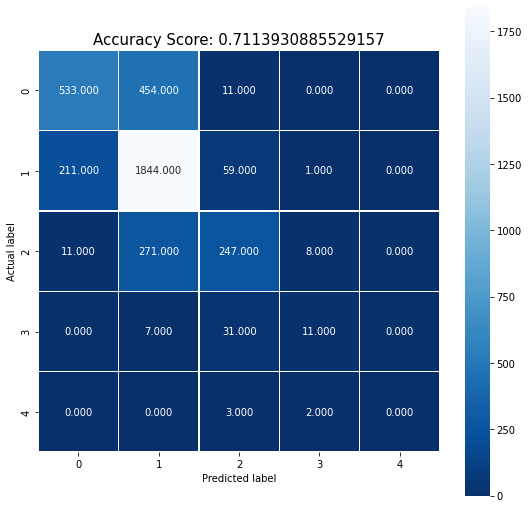

In [ ]:
clf_predictions = clf.predict(X_test)
cm = metrics.confusion_matrix(y_test, clf_predictions)
print(classification_report(y_test , clf_predictions, digits=4))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test , y_test))
plt.title(all_sample_title, size = 15);